## End-to-end Machine Learning Project

This project is obtained from Aurelien Geron's ML book Chapter 2. The aim to predict median house values in Californian districts, given a number of features from these districts.

Main steps we will go through: 
1. Formulate the problem
2. Get the data
3. Discover and visualize data / Data exploration to gain insight 
4. Prep data for ML algorithm testing 
5. Select model and train it
6. Fine-tuning the model 

https://github.com/pgg1610/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb


### Step 1: Formulate the problem 

Prediction of district's median housing price given all other metrics. A supervised learning task is where we are given 'labelled' data for training purpose. Regression model to predict a continuous variable i.e. district median housing price. Given multiple features, this is a multi-class regression type problem. Univariate regression since a single output is estimated. 

### Step 2: Get the data


In [1]:
import pandas as pd
import numpy as np 
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt

#Load the dataset 
housing = pd.read_csv('housing.csv')

In [2]:
housing.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4314,-118.33,34.09,40.0,2004.0,687.0,1514.0,542.0,1.9911,220000.0,<1H OCEAN
462,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,216700.0,NEAR BAY
15014,-117.04,32.76,37.0,2979.0,557.0,1285.0,564.0,3.7368,152200.0,NEAR OCEAN
8492,-118.30,33.90,27.0,3267.0,762.0,2099.0,647.0,3.4000,224100.0,<1H OCEAN
1977,-120.44,38.61,9.0,2598.0,548.0,796.0,297.0,3.5192,98000.0,INLAND
7418,-118.22,33.94,41.0,928.0,249.0,1108.0,236.0,3.4323,144600.0,<1H OCEAN
12936,-121.25,38.66,26.0,3670.0,556.0,1616.0,550.0,5.0200,169600.0,INLAND


Each row presents one district. Each of these districts has 10 attributes (features). 

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


One thing to notice in this dataset is the number of total_bedroom entries is different from other entries. This suggests there are some missing entries or null in the dataset. 

In [4]:
#To show the null elements (if any in the total_bedroom entries)
housing[housing.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


For categorical entries (here, ocean_proximity entries) we can find out the entries and their number using the value_counts(). We can do this for any entry we wish but makes more sense for categorical entries. 

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


Describe is powerful subroutine since that allows us to check the stat summary of numerical attributes

The 25%-50%-75% entries for each column show corresponding percentiles. It indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of observation have median income below 2.56, 50% observations have median income below 3.53, and 75% observations have median income below 4.74. 25% --> 1st Quartile, 50% --> Median, 75% --> 3rd Quartile

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

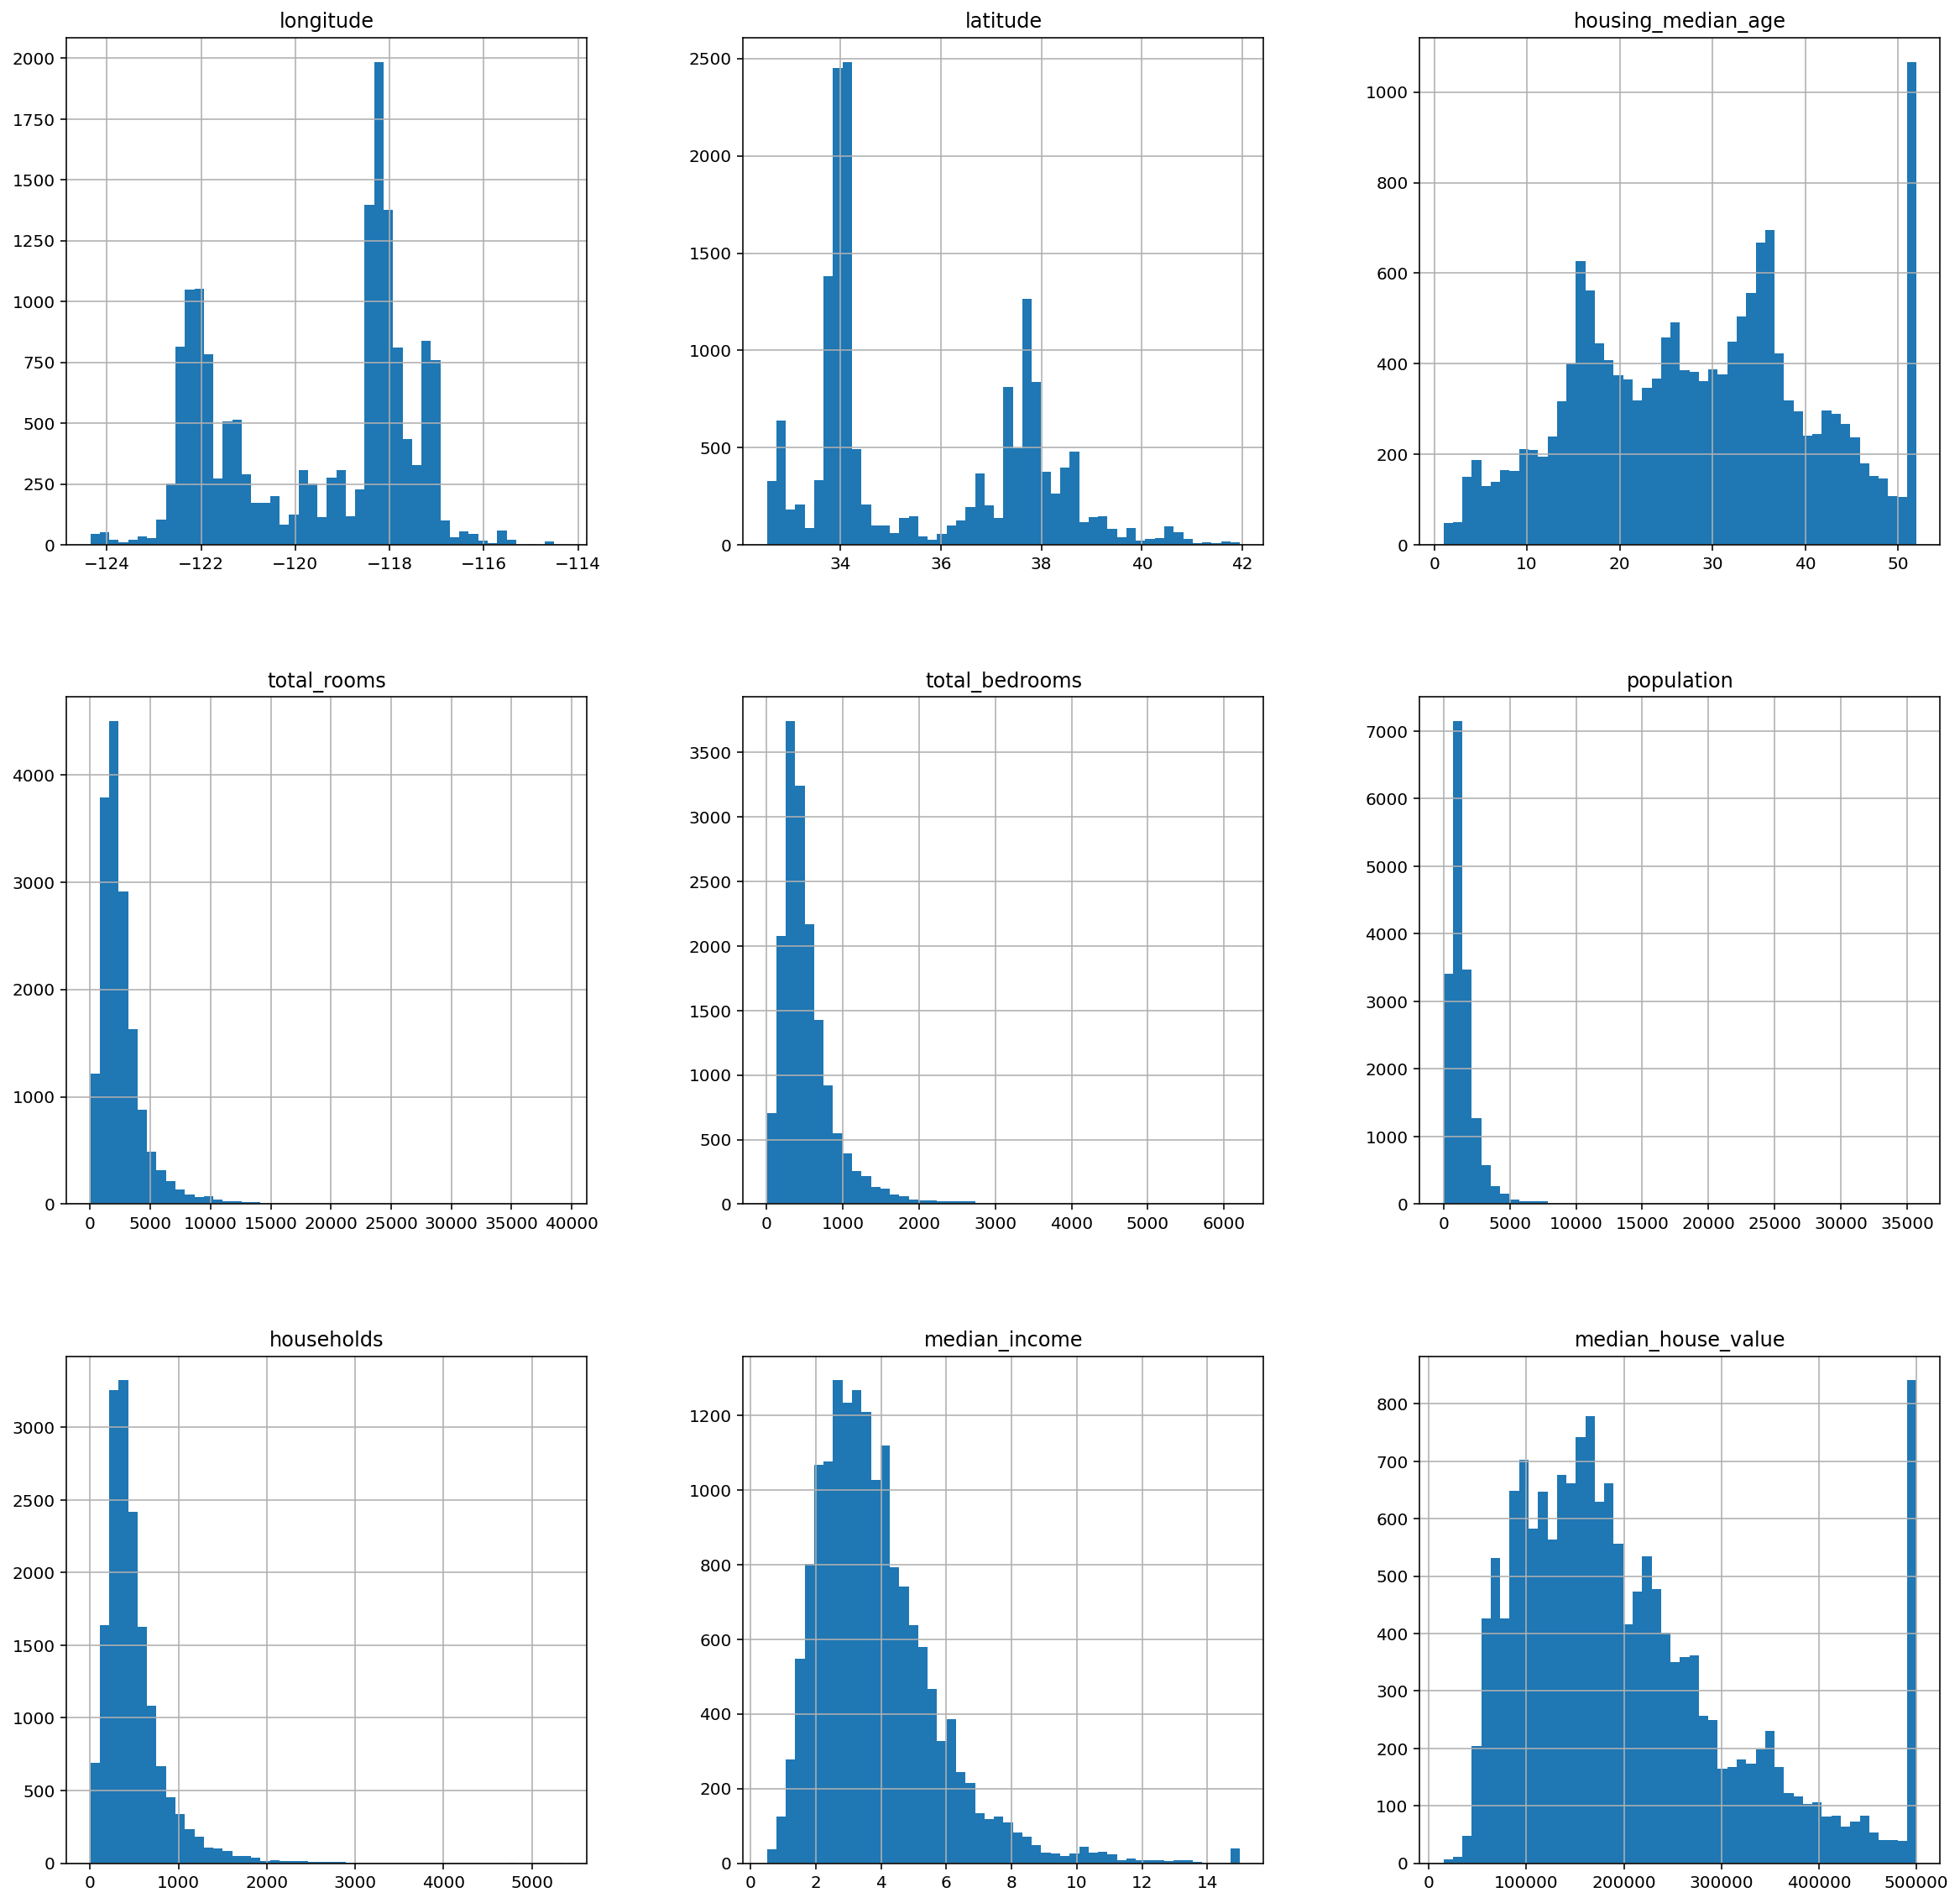

In [29]:
housing.hist(bins=50,figsize=(20,20))

Few observations from the Histogram plots, again remember each row is an entry for an ENTIRE district: 
NOTICE: From the dataset's source disclaimer: The housing_median_value, housing_median_age, median_income_value are capped at an arbitrary value.
1. From latitute and longitude plots there seems to be lots of district in four particular locations (34,37 -- latitude) and (-120,-118 -- longitude). We cannot comment on the exact location but only one on these pairs giving most data. 
2. We see a tighter distribution for total_rooms, total_bedrooms, and population but spread for house_value and an intresting spike at its end. 
3. Small spike at the end of median_income plot suggests presence of small group of affluent families but interestingly that spike does not correlate with the spike in the house_value (More high-end property entries than more "rich" people in a district) 

Finally, the dataset is tail-heavy that is they extend further to the right from the median which might make modeling using some ML algorithm a bit chanellenging. Few entries should be scaled such that the distribution is more normal. 

### Create a test-set

This ensures that this is the data on which training, testing occurs and we do not try overfitting to account for all the variance in the data. Typical 20% of data-points are randomly chosen. 

In [30]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return(data.iloc[train_indices],data.iloc[test_indices])


In [31]:
#To ensure we get similar results at each run -- if not initiated every successive will give more random 
#shuffled indices risking the possibility of the algo seeing the entire dataset! 

np.random.seed(42)

#Random seed set to 42 for no particular reason 
#but just cause its the answer to the Ultimate Question of Life, The Universe, and Everything

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

13210 train + 3302 test


Better way is to have an instance identifier (like id) for each entry to distingusih each entry and see if its sampled or not. 

In [32]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The dataset currently doesnt have inherent id. We could use the row index as id. Or we could use an ad-hoc unique identifier as an interim id. 

In [33]:
#HOUSING DATA WITH ID as ROW INDEX
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

#HOUSING DATA WITH ID AS COMBO OF LAT AND LONG. 
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

#SCIKIT-LEARN IMPLEMENTATION
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

ValueError: cannot convert float NaN to integer

In [28]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
8,4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN
10,16365,-121.31,38.02,24.0,4157.0,951.0,2734.0,879.0,2.7981,92100.0,INLAND
17,2953,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,63300.0,INLAND
19,6569,-118.15,34.20,46.0,1505.0,261.0,857.0,269.0,4.5000,184200.0,INLAND


However the sampling we have considered here or the one used in Scikit-learn is random sampling by default. This is fine for large dataset however for smaller dataset it is utmost important that the sampled data is representative of the main population data or else we will introduce sampling bias. 

This is an important bias that could be introduced without prior knowledge and could be overlooked at multiple occassion leading to wrong conclusions. To ensure the sampled dataset is representative of the population set we  use stratified sampling (pseudo-random sampling). To make the stratified sampling tractable we first divide the main data into multiple 'stratas' based on an variable which we feel is an feature that should be replicated in our test set. The sample is divided into strata and right number of instances are chosen from each strata. We must not have too many stratas and the each strate must have appropriate number of instances.

For the case of property pricing in the district, median_income variable is chosen as the variable whose distribution in the main population and the randomly chosen test sample is same. This attribute is an important attribute to predict the final median housing price. So we can think of converting the continuous variable of median_variable into categorical variable -- that is stratas.

#### Stratified sampling using median income

<AxesSubplot:>

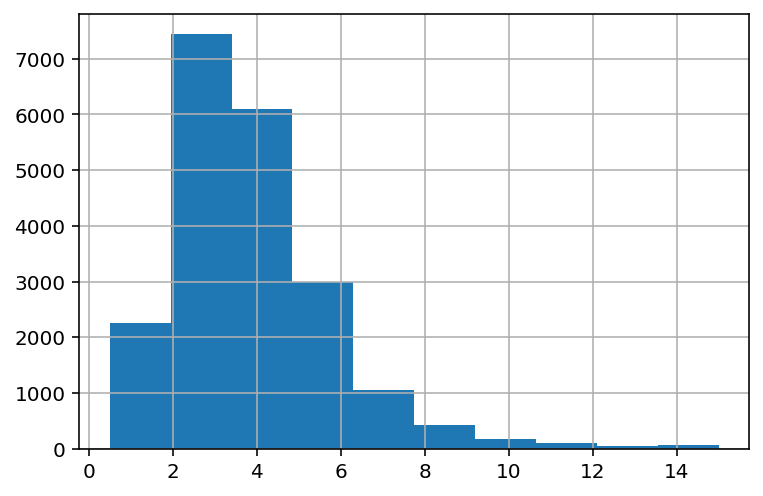

In [13]:
housing["median_income"].hist()

From the median_income histogram it is seen that most of the entries are clustered in the range of 2-5 (arbitrary units). We can then use this information to make stratas around these instances. Cut routine in the pandas is used for this purpose. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], #bins around 2-5 income bracket
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

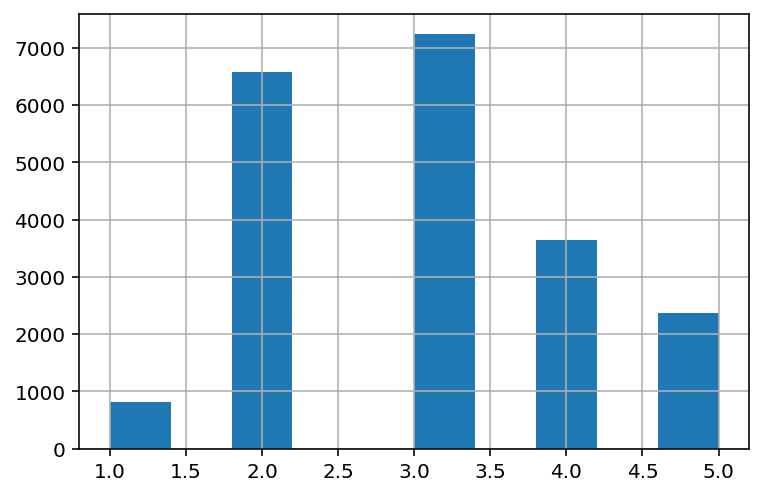

In [15]:
housing["income_cat"].hist()

Now with the population categorised into various median income groups we can use stratified sampling routine (as implemented in scikit-learn) to make our test-set. As an additional proof let's compare this to a randomly sampled test_case. We will redo the random sampling we did prviously but with the new population with categorised median_income. 

In [25]:
#Stratified sampling from scikit-learn 
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#Using random sampling
rand_train_set, rand_test_set = train_test_split(housing, test_size=0.2, random_state=42)

KeyError: 'income_cat'

Let's check the distribution of the income_cat variable in the strat_test, random_test, and the main sample. 

In [17]:
housing["income_cat"].value_counts()/len(housing["income_cat"])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
rand_test_set["income_cat"].value_counts()/len(rand_test_set["income_cat"])

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set["income_cat"])

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [20]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(rand_test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [21]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


Now, we can remove the income_cat column

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

### Preliminary visualization of the data
Let's now dive a bit deeper into the data visualization and analysis. Before we do so, copy the strat_train_set as that would be the data-set we would be playing around and make sure the main data-set is not touched. 

In [23]:
housing=strat_train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


#### Geographical visualization

Let's now plot the data entries in the housing data as per the latitude and longitude. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

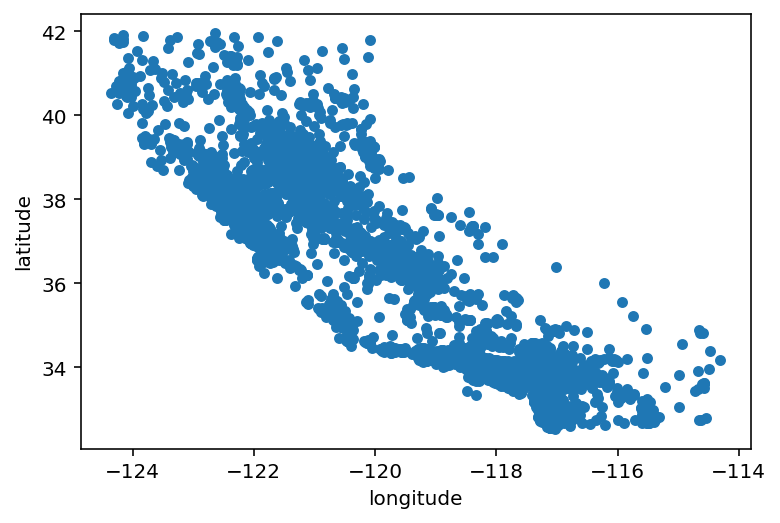

In [24]:
housing.plot(kind='scatter',x='longitude',y='latitude')

This look's like California however, we cannot infer anything more out of this. Let's play around a little bit more...

1. Playing with the alpha value in the plotting routine allows us to see the frequency of THAT datapoint in the plot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

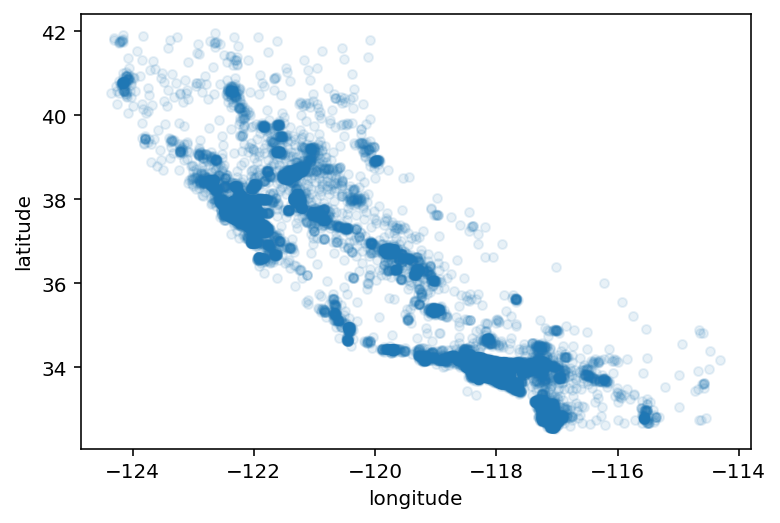

In [25]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

From here, we can see the high density of listings in the Bay area and LA also around Sacramento and Fresco. 
> ## [TODO] Overlay actual map of California on this plot

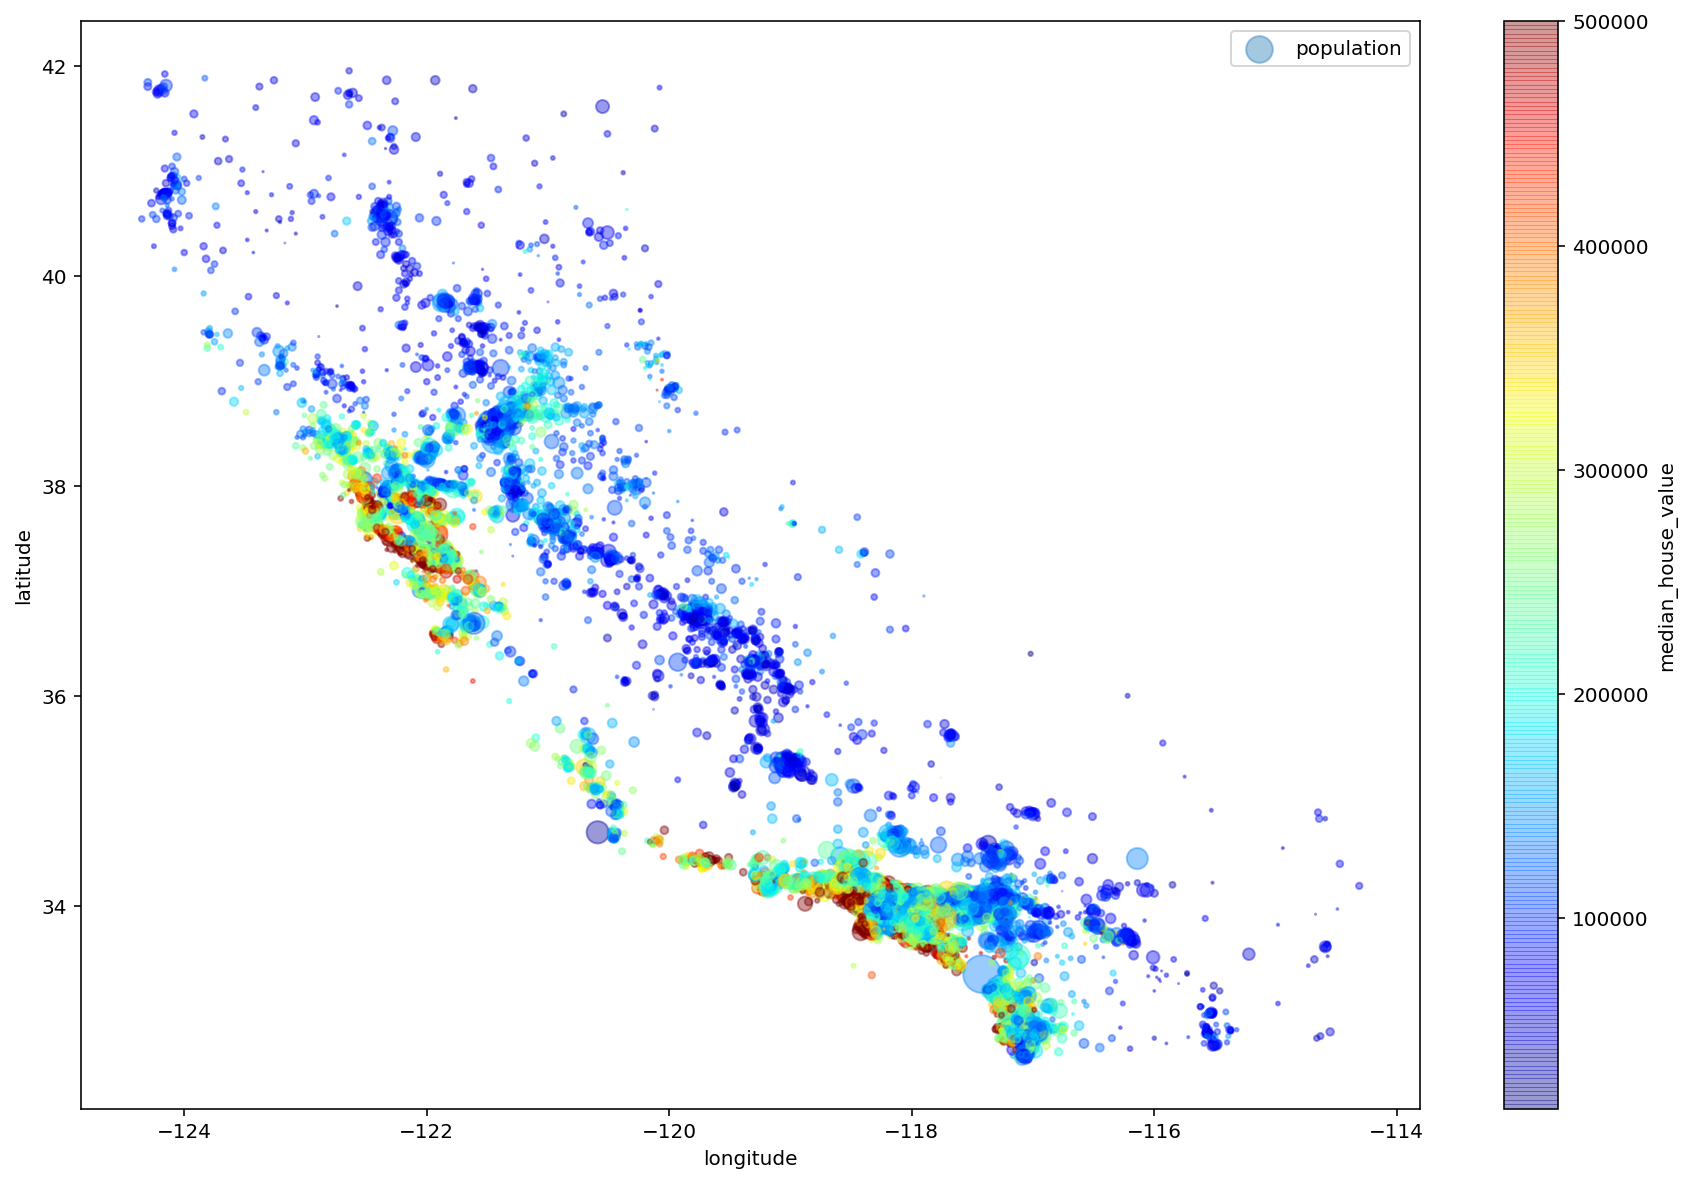

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(15,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

This is more interesting! We have now plotted the data with more information. Each data-point has two additional set of info apart of frequency of occurence. First being the color of the point is the median_house_value entry (option c). The radius of the data-point is the population of that district (option s). It can be seen that the housing prices are very much related to the location. The ones closer to the bay area are more expensive but need not be densely populated.

#### Looking for simple correlations 
In addition to looking at the plot of housing price, we can check for simpler correaltions. Pearson's correlation matrix is something which is in-built in pandas and can be directly used. It checks for correlation between every pair of feature provided in the data-set. It estimates the covariance of the two features and estimates whether the correlation is inverse, direct, or none. 
#### [Formula of Pearson's correlation]

In [27]:
corr_matrix=housing.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.05,0.08,0.11,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.12,-0.08,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.33,-0.30,-0.31,-0.11,0.11
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.14
total_bedrooms,0.08,-0.07,-0.33,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.11,-0.12,-0.30,0.86,0.88,1.00,0.90,0.00,-0.03
households,0.06,-0.08,-0.31,0.92,0.98,0.90,1.00,0.01,0.06
median_income,-0.02,-0.08,-0.11,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.14,0.05,-0.03,0.06,0.69,1.00


In [28]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

The correlation matrix suggests the amount of correlation between a pair of variables. When close to 1 it means a strong +ve correlation whereas, -1 means an inverse correlation. Looking at the correlation between median_house_values and other variables, we can see that there's some correlation with median_income (0.68 -- so +ve), and with the latitude (-0.14 -- so an inverse relation).

Another to check this relation is to plot scatter plots for each pair of variables in the dataset. Below we plot this for few potential/interesting variables 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

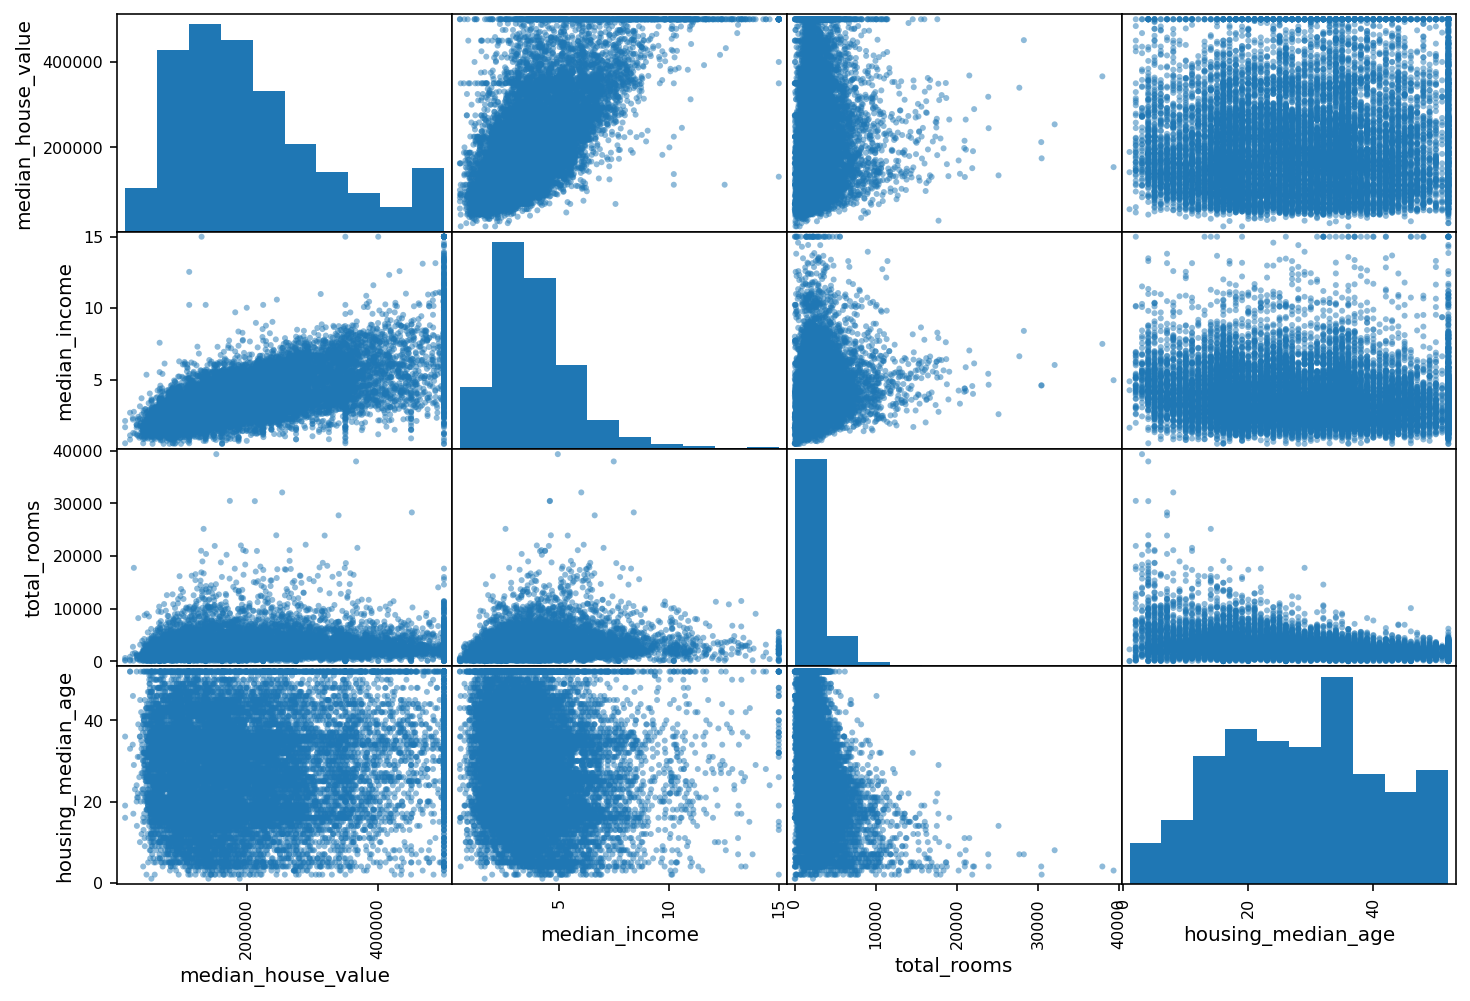

In [29]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

The diagonal entries show the histogram for each variable. We saw this previously for some variables. The most promising variable from this analysis seems to be the median_income. 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

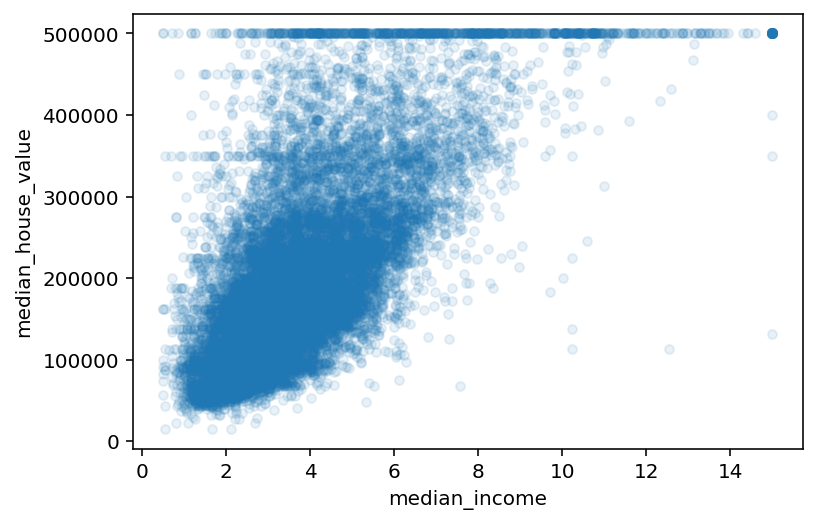

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

Plotting it shows the stronger correlation with the target variable i.e. median_house_value however we can see horizontal lines (especially at USD 500k, 450k 350k) these could be due to some stratifying done in the dataset implicitly. It would be better to remove those to ensure our model does not spuriously fit for those since they are some of the quirks in the data. 

### Experimenting with attributes

Before we began proposing models for the data. We can play around with the variables and try different combinations of them to see if we get better trends. Let's look at a few. First, the total_room and/or total_bedroom variable could be changed to average_bedroom_per_house to better for bedrooms rather than looking for total bedroom in that district we would be looking at avg_bedroom per district and similarly we would do it for rooms. 

In [31]:
#Average bedroom per house-holds in the district 
housing['avg_bedroom']=housing['total_bedrooms']/housing['households']

#Average room per house-holds in the district 
housing['avg_room']=housing['total_rooms']/housing['households']

#Average bedrooms per rooms in a given district
housing['bedroom_per_room']=housing['total_bedrooms']/housing['total_rooms']

#Average population per household in a given district
housing['population_per_household']=housing['population']/housing['households']

#Average room per population in a given district
housing['room_per_popoulation']=housing['total_rooms']/housing['population']

#Average room per population in a given district
housing['room_per_popoulation']=housing['total_rooms']/housing['population']

In [32]:
#Making the correlation matrix again 
corr_matrix=housing.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedroom,avg_room,bedroom_per_room,population_per_household,room_per_popoulation
longitude,1.00,-0.92,-0.11,0.05,0.08,0.11,0.06,-0.02,-0.05,0.01,-0.03,0.10,-0.00,-0.07
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.12,-0.08,-0.08,-0.14,0.07,0.11,-0.12,0.01,0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.33,-0.30,-0.31,-0.11,0.11,-0.08,-0.15,0.14,0.02,-0.10
total_rooms,0.05,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.14,0.03,0.13,-0.19,-0.02,0.12
total_bedrooms,0.08,-0.07,-0.33,0.93,1.00,0.88,0.98,-0.01,0.05,0.04,0.00,0.09,-0.03,0.05
population,0.11,-0.12,-0.30,0.86,0.88,1.00,0.90,0.00,-0.03,-0.07,-0.07,0.04,0.08,-0.14
households,0.06,-0.08,-0.31,0.92,0.98,0.90,1.00,0.01,0.06,-0.06,-0.08,0.07,-0.03,-0.04
median_income,-0.02,-0.08,-0.11,0.20,-0.01,0.00,0.01,1.00,0.69,-0.06,0.31,-0.62,0.02,0.23
median_house_value,-0.05,-0.14,0.11,0.14,0.05,-0.03,0.06,0.69,1.00,-0.04,0.15,-0.26,-0.02,0.20
avg_bedroom,0.01,0.07,-0.08,0.03,0.04,-0.07,-0.06,-0.06,-0.04,1.00,0.86,0.05,-0.01,0.84


In [33]:
corr_matrix['median_house_value'].sort_values(ascending=True)

bedroom_per_room           -0.259984
latitude                   -0.142724
longitude                  -0.047432
avg_bedroom                -0.043343
population                 -0.026920
population_per_household   -0.021985
total_bedrooms              0.047689
households                  0.064506
housing_median_age          0.114110
total_rooms                 0.135097
avg_room                    0.146285
room_per_popoulation        0.199429
median_income               0.687160
median_house_value          1.000000
Name: median_house_value, dtype: float64

This is interesting! We see that `bedroom_per_room` is another potential descriptor with negative corelation moreover we get `room_per_population` and `avg_room` to be decent new descriptors for the `median_house_value`. Not bad for a simple math manipulation to better represent the data. This is a crucial step and where domain knowledge and intuition would come handy. 

### Data cleaning and prepping

1. Separate the predictors and the target values 
2. Write functions to conduct various data transformations ensuring consistency and ease 
3. Make sure the data is devoid of any NaN values since that would raise warning and errors. We have three strategies we can implement here:
    a. Get rid of those points (districts) entirely 
    b. Get rid of whole attribute 
    c. Set missing values to either zero or one of the averages (mean, median, or mode) 

In our case, total bedrooms had some missing values. 
```python
# Option a:
housing.dropna(subset=["total_bedrooms"])
# Option b:
housing.drop("total_bedrooms", axis=1)
# Option c:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # option 3
```

Before we do any of this let's first separate the predictor and target_values

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
#Checking the NULL enties in the dataset
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [36]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [37]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)   #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [38]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


##### Scikit-learn imputer class 
This is a handy class to take of missing values. First, we create an instance of that class with specifying what is to be replaced and what strategy is used. Before doing so, we need to make srue the entire data-set has ONLY numerical entries and Imputer will evaluate the given average for all the dataset and store it in the `statistics_` instance

What the imputer will do is, 
1. Evaluate an specified type of average. 
2. For a given numerical data-set look for NaN or Null entires in a given attribute and replace it with the computed avearge for that attribute 

In [39]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median") #We define the strategy here 
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [40]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

We can now use this as a training variables set for our model

In [43]:
X = imputer.transform(housing_num)

We convert the Pandas dataframe entries to a numpy array which is transformed with appropriately replacing the missing entries with median. 

In [44]:
print(type(X), type(housing_num))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [45]:
print(np.shape(X), housing_num.shape)
'''
If we need the data-frame back
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
'''

(16512, 8) (16512, 8)


'\nIf we need the data-frame back\nhousing_tr = pd.DataFrame(X, columns=housing_num.columns,\n                          index=housing.index)\n'

### Handling Text and Categorical Attribute 

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [46]:
housing_cat = housing[['ocean_proximity']]
type(housing_cat)

pandas.core.frame.DataFrame

Converting the categorical entries to integers

In [47]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20
    
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [48]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

Now, `housing_cat_encoded` has converted the categorical entries to purely numerical values for each category

In [49]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Now, this is helpful with the string categories getting converted to numerical categories. However, there is still an small issue. The categorical numbering may introduce some bias in the final model. **ML algorithms will assume that two nearby values are more similar than two distant values.** 

In the above case, '<1H OCEAN' and 'INLAND'have category values as 0 and 1 however '<1H OCEAN' is more closer to 'NEAR OCEAN' with category value 4. 

To fix this issue, one solution is to create one binary attribute per category. This is called **One-hot encoding** as ONLY one of the attribute in the vector is 1 (hot) and others are 0 (cold). 

Scikit-learn provides a `OneHotEncoder` encoder to convert integer categorical values to one-hot vectors.

In [50]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
#1-Hot encoded vector for the housing training data-set 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

A sparse array is declared in this case which has the position of the non-zero value and not necessarily the entire numpy matrix. This is helpful in the cases where there are too many categories and also many datapoints. For examples, if we have 4 categories and 1000 datapoints the final one-hot matrix would be 1000x4 size. Most of that would be full of 0s, with only one 1 per row for a particular category. 

The `housing_cat_1hot` can be converted to numpy array by using the `housing_cat_1hot.toarray()` 

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`

In [51]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes:

In [52]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin
# get the right column indices: safer than hard-coding indices
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col) for col in ("total_rooms", "total_bedrooms", "population", "households")]

#Here we convert the housing.columns to list and 
#then find the index for the entry which matches the string in the loop 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

From the above class, there's only one hyperparameter in the class. `add_bedrooms_per_room` is the only option and is set True by default. Let's check the new feature space by converting it to a `Pandas Dataframe`

In [54]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["bedrooms_per_room","rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341


### Feature scaling 

Feaature scaling is an important transformation needed to be applied to the data. With some exceptions, ML algorithms dont perform well when the input numerical entries have very different scales. Eg: One variable has range 0-1 but other variable has range 1-1000. This is the case in our data-base where the total number of rooms range from 6 to 39,320 while the objective variable i.e. median income only ranges from 0-15. Two common ways of scaling: 

1. Min-max scaling (also called Normalization) 
Values are shifted such that they are normalized. They are rescaled in the range of 0-1. We do this by subtracting the min value and dividing by the range in the data
\begin{equation}
x_{i} = \frac{X_{i}-min}{max-min}
\end{equation}

2. Standardization 
This is when the mean of the dataset is subtracted from each entry so that the data has mean as 0 and then divided by the standard deviation so that the resulting distribution has a unit variance. Unlike min-max scaling, standardization does not bound to a particular range like 0-1. However, **standardisation is much less affected by outliers.** If a particular values is extremely high or low that could affect the other inputs in the case of min-max scaling. However that effect is reduced in the case of standardization given it does not directly account for the range in the scaling but the mean and variance. 
\begin{equation} 
x_{i} = \frac{X_{i}-\mu}{\sigma}
\end{equation} 

>**NOTE:** It is important that these scaling operations are performed on the training data only and not on the full dataset 

### Transformation pipelines

`Pipeline` class in scikit-learn can help with sequences of transformations. 
Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #Fill in missing values using the median of each entry 
        ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)), #Add additional columns entrys
        ('std_scaler', StandardScaler()), #Feature scaling -- using standardisation here 
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

This `Pipeline` constructor takes a list of name/estimator pairs defining a sequence of steps. **All but the last step/estimator must be the trasnformers (like feature scaling).** 

In [57]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

**Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):**

In [58]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [59]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [60]:
housing_prepared.shape

(16512, 16)

# Step 3: Select and train a model 

Finally. 

### Training and evaluation on the training set 
Given the prioir transformations, the features are scaled, categories are converted to one-hot vectors, and the missing variables are taken account of. Let's train a Linear Regression model first

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() 
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [62]:
#Test some data out on the model 
trial_input = housing.iloc[:5] #First 5 entries 
trial_label = housing_labels.iloc[:5] #First 5 labels corresponding to the entries 
prep_trial_input = full_pipeline.transform(trial_input) #Transforming the entries to suit the trained input 
print('Predictions:',lin_reg.predict(prep_trial_input))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [63]:
print('Labels:',list(trial_label))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [64]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [65]:
housing_labels.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

As seen the RMSE is 68628 which is better than nothing but still it is quite high when the range of the `median_house_values` range from 15000 to 500000

In [66]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

Here the model is underfitting the data since the RMSE is so high.
> When this happens either the features do not provide enough information to make good predictions or the model is not powerful enough. 

Let's try using a more complex model, `DecisionTreeRegressor` which is capable of finding non-linear relationships in the data

### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [68]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# LOL! 

This model is badly overfitting the data! Let's proof this hypothesis using cross-validation schemes. We dont want to touch the test set, JUST WORK WITH THE TRAINING SET. Only touch the test set when the model we are using is good enough. We will use the part of the training set for training and other part for model validation. 

### Fine-tune the model

**Cross-validation** 

Cross-validation is a method of getting reliable estimate of model performance using only the training data 10-fold cross-validation --- breaking training data in 10 equal parts creating 10 miniature test/train splits. Out of the 10 folds, train data on 9 and test on 10th. Do this 10 times each time holding out different fold.

> Scikit-learn cross-validation feature expects a utility function (greater the better) rather than a cost function (lower the better), so to score the functions we use opposite of MSE, which is why we again compute `-scores` before calculating the square root

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [70]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


Cross-validation not only allows us to get an estimate of the performance of the model but also the measure of how precise this estimate is (i.e. standard deviation). The Decision tree has high std-dev. This information could not be obtained with just one validation set. However, caveat is that cross-validation comes at the cost of training the model several times, so it is not always possible.

Let's compute the same score for `LinearRegresson` model. 

In [71]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


Here it can be seen that DecisionTree model performs much worse than the LinearRegression model. 

### Random Forrest Regressor

Random forrest works by employing many decision trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called `Ensemble Learning` and it is often great way to push ML algorithms even further. 

In [72]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

>**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [73]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [74]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


Random forest regressor looks better than `DecisionTree` and `LinearRegression`. The RMSE is still quite high for production quality code and could be due to overfitting. We can try other algorithms before spending time on a particular algorithm tweaking the hyperparameters. The goal is to shortlist 2-3 methods that are promising then fine-tune the model. Before we move ahead we can take a look at one more ML algorithm which is commonly employed for such supervised learning cases: Support Vector Regression

In [75]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

# Step 4: Fine-tune the model

Once we settle for an algorithm we can fine-tune them efficiently using some of the in-built scikit-learn routines. 

### Grid Search

`GridSearchCV` is a faster way of tweaking the hyper-parameters for a given algorithm. It needs the hyper-parameters you want to experiment with, what values to try out, and it will evaluate possible combination of hyperparameters values using cross-validation. We can do that step for `RandomForrestRegressor` which we found to have lowesst RMSE of the three methods we tried 

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The `param_grid` tells Scikit-learn to:
1. First evaluate 3x4 combinations of n_estimators and max_features with bootstrap `True` which is the default. 
2. Then with bootstrap set as `False` we look for 2x3 combinations of n_estimators and max_featurs for the random forest 
3. Finally, both these models are trained 5 times for the cross validation purposes in a 5-fold cross-validation fashion. 

Total of (12+6)x5=90 round of training are conducted. Finally when it is done we get the best model parameters which give lowest RMSE. 

In [77]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [80]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.054771,0.003706,0.003080,0.000260,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.172647,0.006104,0.009256,0.001300,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.502750,0.005662,0.023173,0.000660,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.081864,0.000842,0.003041,0.000063,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.270752,0.002434,0.008389,0.000097,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.807219,0.004721,0.023184,0.000534,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537883e+09,1.214614e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.109511,0.004092,0.003060,0.000083,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441458e+09,1.893056e+08,14,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.368655,0.004250,0.008506,0.000319,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704645e+09,1.471569e+08,6,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.112361,0.006665,0.023521,0.000904,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514673e+09,1.285080e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.140054,0.001447,0.003148,0.000092,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348850e+09,1.241939e+08,13,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


### Randomised search

Grid search approach is fine when we are exploring relatively few combinations. But when hyperparameter space is large it is often preferrable to use `RandomizedSearchCV` instead. Here instead of doing all the possible combinationes of hyperparameters, it evaluates a given number of random combinations by selecting a random value for each hyper parameter at every iteration. 

### Ensemble search

Combine models that perform best. The group or 'ensemble' will often perform better than the best individual model just like RandomForest peforms better than Decision Trees especially if we have individual models make different types of errors. 

# Step 5: Analyze the Best Models and their Errors

`RandomForestRegressor` can indicate the relative importance of each attribute for making the accurate predictions. 


In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [82]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

# Step 6: Evaluate the model on the Test Set

In [84]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

Text(0, 0.5, 'Actual Value')

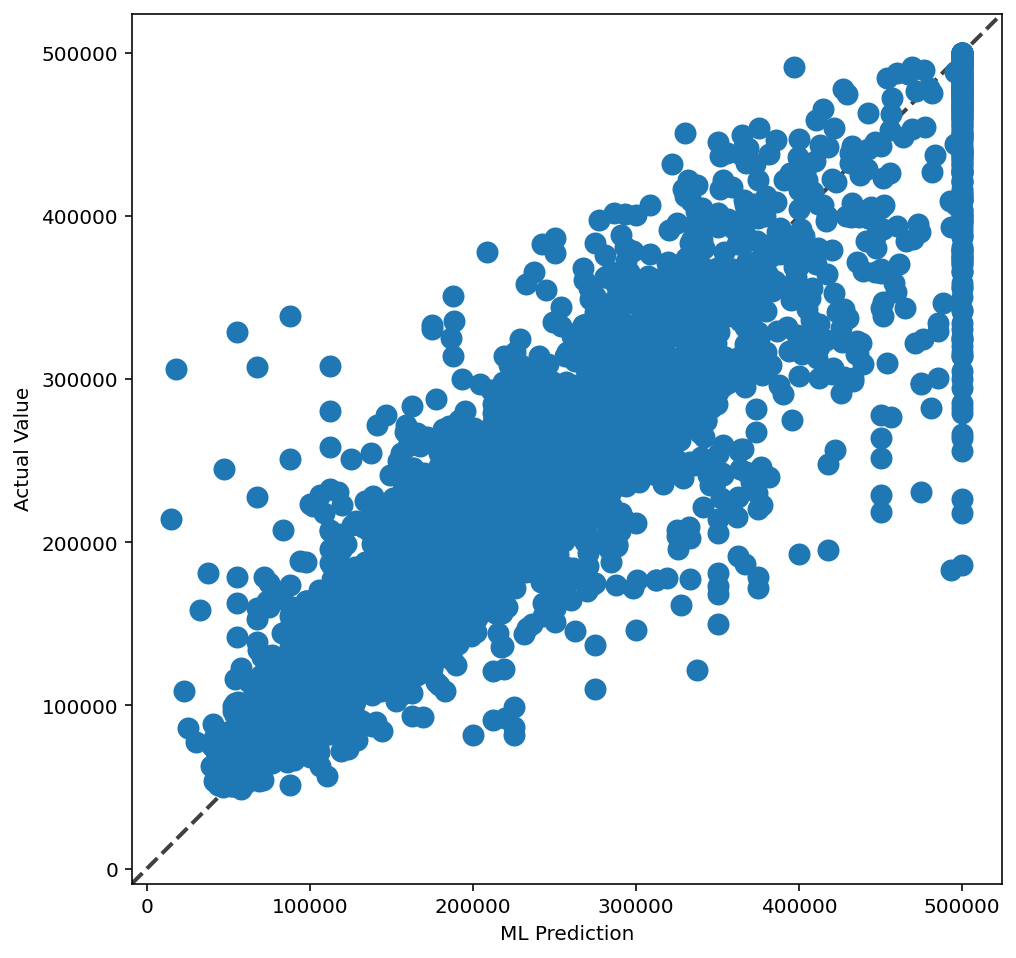

In [87]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(y_test, final_predictions, s=100)

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
       ]

ax.plot(lims, lims, 'k--', linewidth=2.0, alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel('ML Prediction')
ax.set_ylabel('Actual Value')

In [88]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47730.22690385927


We can compute a 95% confidence interval for the test RMSE:

In [89]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

Alternatively, we could use a z-scores rather than t-scores:

In [90]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136594, 49690.68623889426)